# **Trabajo de investigacion de Modelo predictivo SHAP**
# *SHAP(SHapley Additive exPlanations)*
El objetivo: 
* aplicar modelo de clasificacion RandomForestRegressor
* tomar un dataFrame de ejemplo 
* aplicar analisis de dato
* generar entrenamiento
* visualizacion de datos

In [50]:
import numpy as np # linear algebra
np.bool = np.bool_
np.float = float 
import matplotlib.pyplot as plt
# import matplotlib
# matplotlib.use('TkAgg') #util para visualizar las imagenes y guardarlas en una ruta fija.
import seaborn as sns
import shap
from sklearn.model_selection import KFold,train_test_split,cross_val_predict,StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# from lime import lime_tabular
import warnings
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sys import path
import os
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import functions

shap.initjs()
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")


../resources/allColProSol.xlsx
../resources/dataset_a_2021.csv
../resources/dataset_a_2021c2.csv
../resources/dataset_a_2021v1.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv
../resources/exitoFallidoEnviosProgramaSol.xlsx
../resources/exitoFallidoProgramaSol.xlsx
../resources/exitosoFallidosEnviosAllColProSol.xlsx
../resources/exitosoFallidosEnviosAllColSol.xlsx
../resources/exitososFallidosEnviosSol.xlsx
../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../resources/sinColCeroExitosoFallidosSol.xlsx
../resources/v2_hitosExitoFalloColESol1.csv
../resources/v2_hitosExitoFalloColESol1Prograna.csv
../resources/v2_hitosExitoFalloSol1Programa.csv
../resources/causalidad\causalidad.dot
../resources/causalidad\causalidad.png
../resources/causalidad\causalidad2.dot
../resources/causalidad\causalidad_e29.dot
../resources/causalidad\causalidad_exitosos.dot
../resources/causalidad\causalidad_hito1.dot
../

In [51]:
# Read and preview data
df = pd.read_csv("../resources/v2_hitosExitoFalloColESol1.csv", delimiter=";", skipinitialspace=True)

In [52]:
df.describe()

,hito1,hito2,exitosos,fallidos,e0,e1,e2,e3,e4,e5,...,e44,e45,e46,e47,e48,e49,e50,e51,e52,sol1
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.0,839.000000,839.000000,839.0,...,839.000000,839.0,839.0,839.0,839.0,839.0,839.0,839.0,839.0,839.000000
mean,13.353993,0.168057,7.476758,11.287247,0.505364,0.009535,0.0,0.352801,0.734207,0.0,...,0.010727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.642789
std,10.370917,1.929950,5.361101,8.432787,0.500269,0.097239,0.0,0.478126,0.442018,0.0,...,0.103076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.832625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
25%,3.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.200000
50%,13.000000,0.000000,7.000000,10.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.700000
75%,20.000000,0.000000,11.000000,16.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.100000
max,42.000000,32.000000,28.000000,47.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000


In [53]:
#creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df['aprobado']=df.apply(lambda x: functions.set_in_aprobado_nota(x['sol1']),axis = 1 )
print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'sol1', 'aprobado'],
      dtype='object')


In [54]:
# verificar los valores en todas las columnas
student_array = df.to_numpy()

# Verificar si hay valores no finitos en el dataset
is_finite = np.isfinite(student_array)

print(is_finite)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [55]:
# Obtener los valores correspondientes donde is_finite es True
finite_values = student_array[is_finite]
print(finite_values)

[17.  0. 10. ...  0.  7.  1.]


In [56]:
# Verificar si hay valores NaN en el dataset
is_nan = np.isnan(student_array)
print(is_nan)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


# **Entrenamiento**
Preparando las coordenadas de análisis X/Y, donde utilizaremos la columna 'sol1' (notas) como referencia para el eje Y, y analizaremos el comportamiento de las demás columnas en relación a dicho eje X.

In [57]:
y = df['aprobado']
X = df[
    ['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52']
]

Se dividen los datos en un conjunto de entrenamiento (80% de los datos) y un conjunto de prueba (20% de los datos), y almacena esos conjuntos en las variables correspondientes. Esto es útil para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state= 1502)

# *Modelo de regresión lineal (Linear Regression)*

+ `Linear Regression` El modelo de regresión lineal es un algoritmo utilizado para modelar la relación entre una variable dependiente y una o más variables independientes. En este caso, se ajusta el modelo de regresión lineal con los siguientes parámetros:
+ `positive=True`: Este parámetro especifica que los coeficientes del modelo deben ser positivos. Es decir, impone la restricción de que los valores de los coeficientes deben ser mayores o iguales a cero. Esta opción es útil cuando se desea asegurar que las predicciones sean siempre no negativas.
+ `fit_intercept=True`: Este parámetro indica si se debe calcular o no el intercepto del modelo. Cuando está establecido en True, se calcula el valor del intercepto. El intercepto representa el valor de la variable dependiente cuando todas las variables independientes son igual a cero.

In [59]:
# Ajustar el modelo de regresión lineal
model = LinearRegression(
    positive=True,
    fit_intercept=True
)
model.fit(X_train, y_train)

LinearRegression(positive=True)

In [60]:
# Realizar Stratified K-Fold Cross-Validation en los datos de entrenamiento
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1502)

# Matrices para almacenar los resultados de validación cruzada
cv_scores = []
cv_predictions = []

for train_index, val_index in kfold.split(X_train, y_train):
    # Dividir los datos en conjuntos de entrenamiento y validación
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Entrenar el modelo en el conjunto de entrenamiento del fold actual
    model.fit(X_train_fold, y_train_fold)

    # Realizar predicciones en el conjunto de validación del fold actual
    y_val_pred = model.predict(X_val_fold)

    # Calcular el error cuadrático medio en el conjunto de validación del fold actual
    fold_score = mean_squared_error(y_val_fold, y_val_pred)
    cv_scores.append(fold_score)

    # Almacenar las predicciones del fold actual para su uso posterior
    cv_predictions.extend(y_val_pred)

    # Calcular el coeficiente de determinación en el conjunto de validación del fold actual
    r2 = r2_score(y_val_fold, y_val_pred)
    print("Fold - Error cuadrático medio:", fold_score)
    print("Fold - Coeficiente de determinación (R2):", r2)
    print()

# Calcular la puntuación promedio de validación cruzada
avg_score = np.mean(cv_scores)
percentage_score = avg_score * 100
print("Promedio del error cuadrático medio en validación cruzada:", avg_score)
print("Promedio del error cuadrático medio en validación cruzada en %:", percentage_score)

Fold - Error cuadrático medio: 0.2235162823532011
Fold - Coeficiente de determinación (R2): 0.0989195382727096

Fold - Error cuadrático medio: 0.22167924972076627
Fold - Coeficiente de determinación (R2): 0.10831706810347674

Fold - Error cuadrático medio: 0.2517151017751211
Fold - Coeficiente de determinación (R2): -0.01797215483650305

Fold - Error cuadrático medio: 0.18866552507012
Fold - Coeficiente de determinación (R2): 0.2370094215857942

Fold - Error cuadrático medio: 0.20077299394904521
Fold - Coeficiente de determinación (R2): 0.18804507221868128

Fold - Error cuadrático medio: 0.2015404099782456
Fold - Coeficiente de determinación (R2): 0.18494153117806822

Fold - Error cuadrático medio: 0.24240953376213317
Fold - Coeficiente de determinación (R2): 0.01966090355115724

Fold - Error cuadrático medio: 0.19673187816636178
Fold - Coeficiente de determinación (R2): 0.20438792694702912

Fold - Error cuadrático medio: 0.2035741921828
Fold - Coeficiente de determinación (R2): 0.1767

Si el RMSE es 0, significa que el modelo predice perfectamente los valores reales. Cuanto más cerca esté el MSE o RMSE de cero, mejor será el rendimiento del modelo en términos de la diferencia entre las predicciones y los valores reales.

In [61]:
# Calcular los valores SHAP para las predicciones
explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# *Visualizando entrenamiento*
+ `explainer.expected_value`: Esto representa el valor esperado de las predicciones del modelo. Es el valor base al que se le suma o se le resta la contribución de cada característica para obtener la predicción final.
+ `shap_values[0,:]`: Estos son los valores SHAP para una muestra en particular del conjunto de prueba. Estos valores representan la contribución de cada característica en la predicción para esa muestra específica.
+ `X_test.iloc[0,:]`: Esto corresponde a la primera muestra del conjunto de prueba (X_test). Representa los valores de las características para esa muestra.
+ `link='logit'`: Este parámetro especifica la función de enlace utilizada para transformar los valores SHAP. En este caso, se utiliza la función logística (logit) para mapear los valores SHAP a una escala interpretable.
+ `matplotlib=True`: Este parámetro indica que se utilizará la biblioteca Matplotlib para generar el gráfico de fuerza.

`"higher"` se refiere a las instancias que tienen valores más altos de la característica en comparación con otras instancias, y tienen un mayor impacto en la probabilidad de ser `"aprobado"`. Por otro lado, `"lower"` se refiere a las instancias con valores más bajos de la característica, que tienen un menor impacto en la probabilidad de ser `"aprobado"`.

Utilizando LinearRegresion podemos ver la interpretacion la cual nos muestra el mayor impacto positivo:
+ e42: respondida(1) 65% de importancia.
+ e29: respondida(1) 55% de importancia.
+ e3: respondida(1) 50% de importancia.
+ e0: respondida(1) 45% de importancia.
+ e26: respondida(1) 43% de importancia.

Y el impacto mas bajo:
+ fallidos = 4 errores para el exito de respuesta de menor importancia.
+ e7 = sin responder con un 70% de menor importancia.

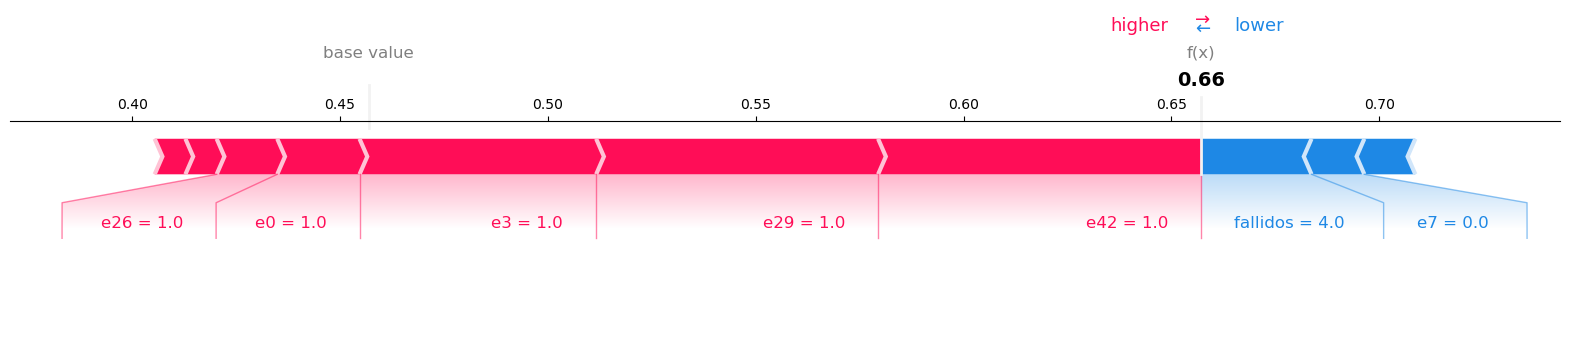

In [62]:
# Crear la figura de matplotlib
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], matplotlib=True)

+ Valor esperado (baseline): El explainer.expected_value representa el valor esperado de la variable objetivo calculado por el modelo. Puede considerarse como la contribución media de todas las características al resultado.

+ Puntos en el gráfico: Cada punto en el gráfico representa una instancia de prueba individual. La posición horizontal del punto representa el valor de la contribución de la característica en esa instancia, y la posición vertical muestra la instancia de prueba en sí.

+ Color del punto: El color del punto indica el valor de la característica para esa instancia de prueba. Los puntos azules indican valores bajos, mientras que los puntos rojos representan valores altos.

+ Desplazamiento desde el valor esperado: La posición horizontal del punto con respecto al valor esperado muestra si la contribución de la característica está aumentando (hacia la derecha) o disminuyendo (hacia la izquierda) el valor predicho en comparación con el valor esperado.

+ Longitud de la barra: La longitud de la barra que se extiende desde el punto representa la magnitud de la contribución de la característica en la predicción. Las barras más largas indican una mayor influencia en la predicción del modelo.

In [63]:
shap.force_plot(explainer.expected_value, shap_values, X_test.columns, matplotlib=False)

Si revisamos sus caracteristicas podemos apreciar que:
+ la pregunta de la guia e29 tiene el maximo impacto y con varios puntos a observar.
+ fallidos pueden ser muy significativos para el apoyo del analisis.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


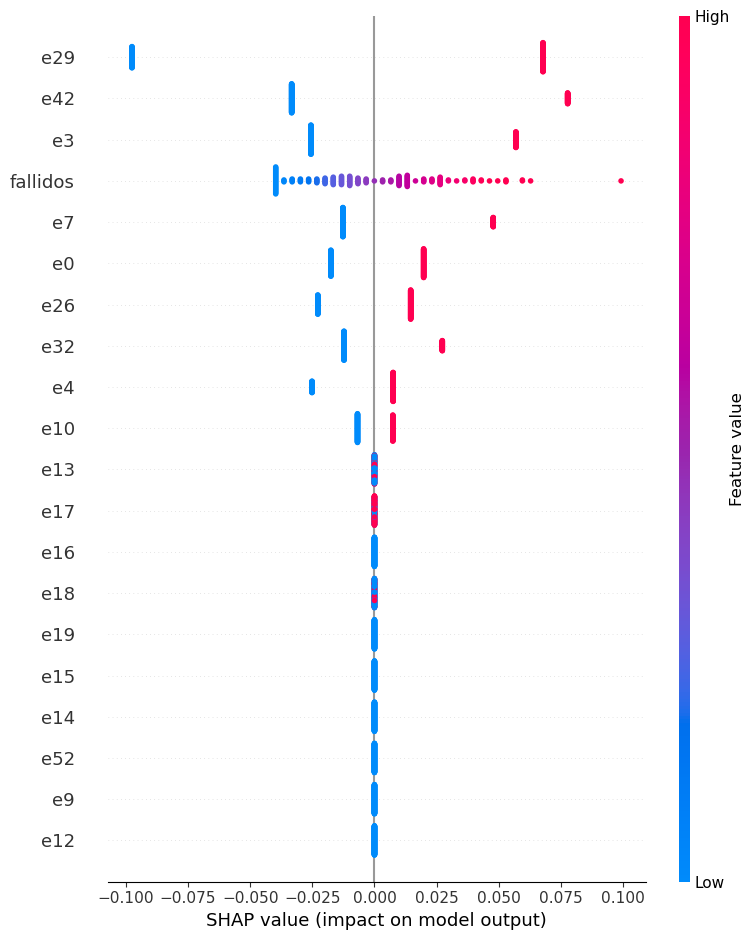

In [64]:
# Mostrar los gráficos SHAP
shap.summary_plot(shap_values, X_test)

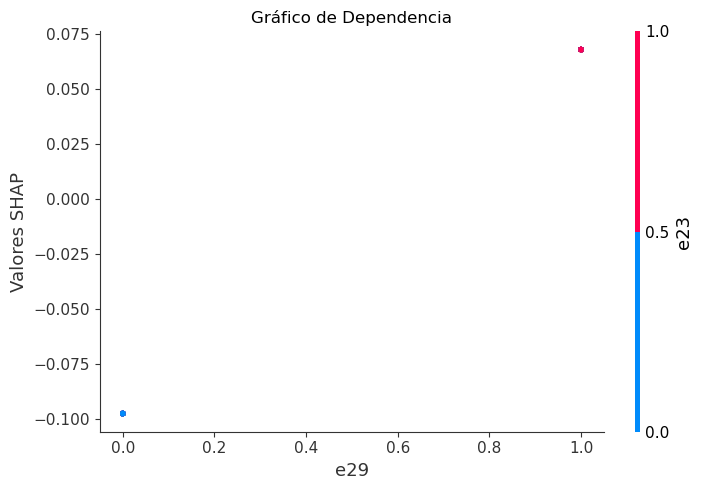

In [65]:
# Obtener el índice de la variable "exitosos" en tu DataFrame
indice = X.columns.get_loc("e29")

# Crear el gráfico de dependencia para "exitosos"
shap.dependence_plot(indice, shap_values, X_test, feature_names=X.columns, show=False)

# Personalizar la apariencia del gráfico
plt.xlabel("e29")
plt.ylabel("Valores SHAP")
plt.title("Gráfico de Dependencia")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

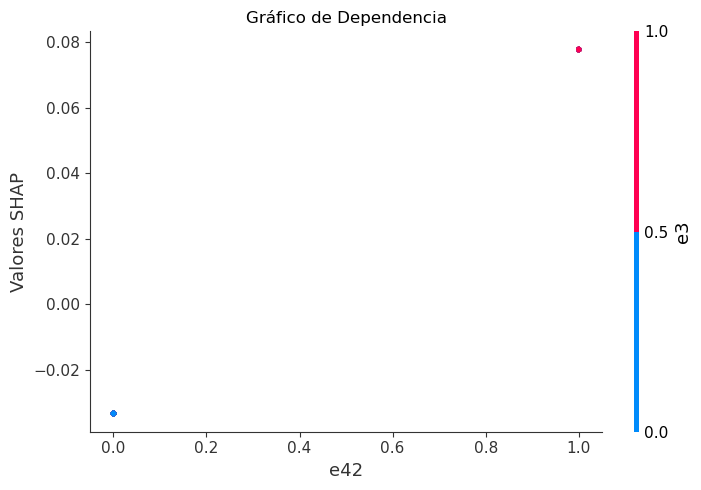

In [66]:
# Obtener el índice de la variable "exitosos" en tu DataFrame
indice = X.columns.get_loc("e42")

# Crear el gráfico de dependencia para "exitosos"
shap.dependence_plot(indice, shap_values, X_test, feature_names=X.columns, show=False)

# Personalizar la apariencia del gráfico
plt.xlabel("e42")
plt.ylabel("Valores SHAP")
plt.title("Gráfico de Dependencia")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

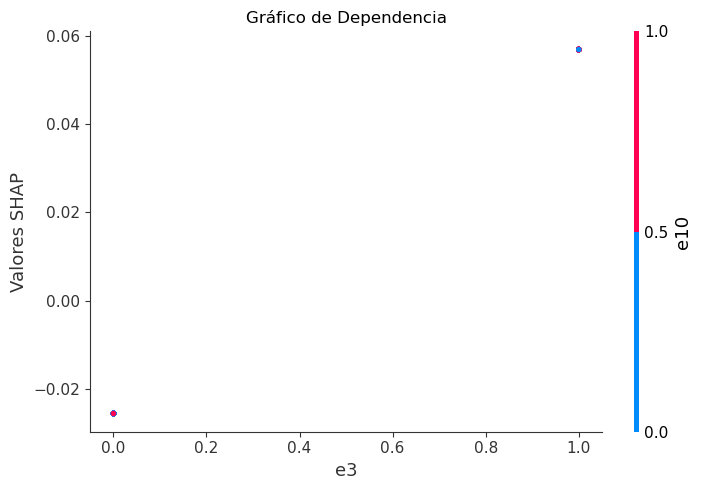

In [67]:
# Obtener el índice de la variable "exitosos" en tu DataFrame
indice = X.columns.get_loc("e3")

# Crear el gráfico de dependencia para "exitosos"
shap.dependence_plot(indice, shap_values, X_test, feature_names=X.columns, show=False)

# Personalizar la apariencia del gráfico
plt.xlabel("e3")
plt.ylabel("Valores SHAP")
plt.title("Gráfico de Dependencia")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

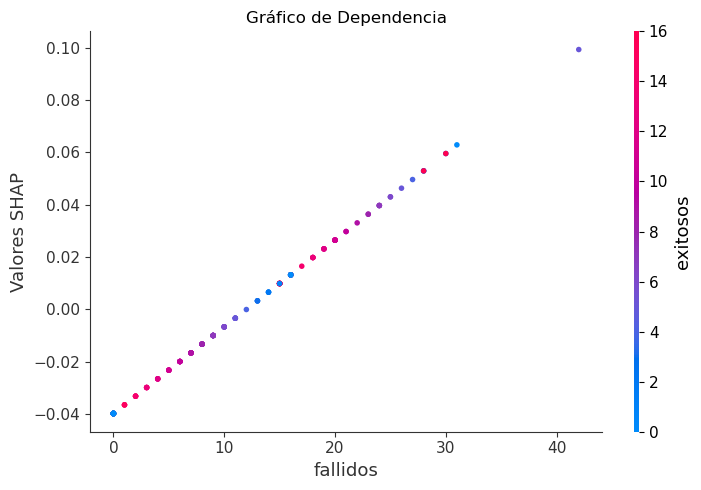

In [68]:
# Obtener el índice de la variable "fallidos" en tu DataFrame
indice = X.columns.get_loc("fallidos")

# Crear el gráfico de dependencia para "fallidos"
shap.dependence_plot(indice, shap_values, X_test, feature_names=X.columns, show=False)

# Personalizar la apariencia del gráfico
plt.xlabel("fallidos")
plt.ylabel("Valores SHAP")
plt.title("Gráfico de Dependencia")
plt.tight_layout()

# Mostrar el gráfico
plt.show()